# Regression with a Flood Prediction Dataset

## corelacao de pearson

# pip install
##   tensorflow,
##  numpy
##   scikeras
##   seaborn
##   pandas
##   matplotlib
##   sklearn
##   


In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras import layers,models,utils
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential


verbose = 0

salvando validacao treino e teste

In [2]:
df = pd.read_csv("train_val_df.csv")
df_test = pd.read_csv("test_df.csv")

<AxesSubplot:>

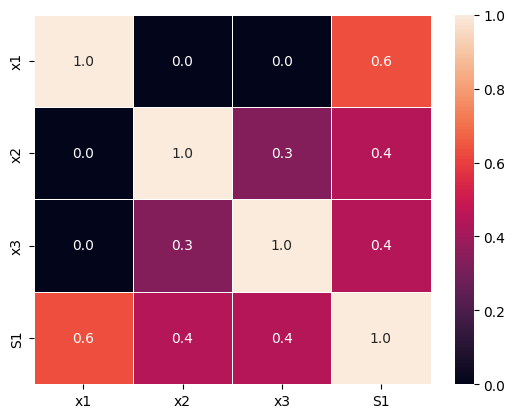

In [3]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

## Divida os dados de treinamento em entrada X e saída Y

In [4]:
df = df.sample(frac=1, random_state=420).reset_index(drop=True)
print(df)
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   
respostas = df_test.iloc[:, -1].values
df_test = df_test.iloc[:, :-1]


   x1  x2  x3  S1
0   1   1   1   1
1   1   0   0   0
2   0   1   1   0
3   0   1   0   0
4   0   0   0   0
5   0   0   1   0


## Create a model with optimizer and init


In [5]:
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(2, input_dim=X.shape[1], activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))  # Para uma saída binária
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


In [6]:
create_model()

Epoch 1/2000
6/6 [==============================] - 0s 104us/step - loss: 0.6747 - accuracy: 0.6667
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.8333
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.8333
Epoch 4/2000
6/6 [==============================] - 0s 0s/step - loss: 0.6661 - accuracy: 0.8333
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.8333
Epoch 6/2000
6/6 [==============================] - 0s 0s/step - loss: 0.6605 - accuracy: 0.8333
Epoch 7/2000
6/6 [==============================] - 0s 681us/step - loss: 0.6569 - accuracy: 0.8333
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.8333
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.8333
Epoch 10/2000
6/6 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.8333
Epoch 11/2000
6/6

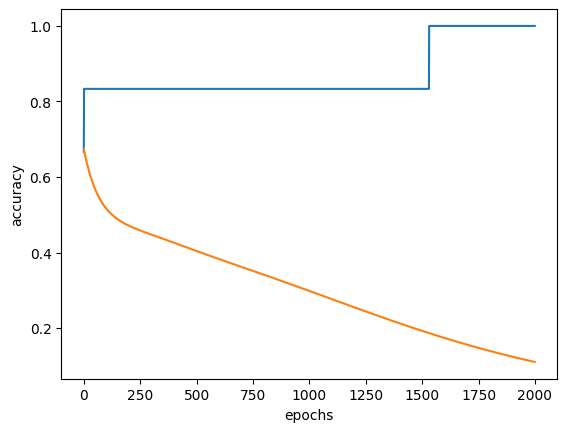

1/1 [==============================] - 0s 67ms/step


In [7]:
model = create_model()

historia = model.fit(X, y, epochs=2000, batch_size=1, verbose=1)
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()
prediction = model.predict(df_test)

##

1/1 [==============================] - 0s 14ms/step
[0, 0] [0 0]


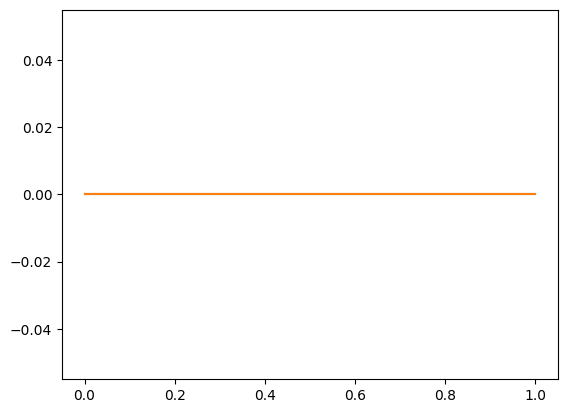

Pesos da primeira camada:
[[-2.1714282   2.0880122 ]
 [-1.0975306   0.95187896]
 [-1.0286831   1.3824998 ]]
Bias da primeira camada:
[ 2.2736325 -2.3900836]


In [8]:


prediction = model.predict(df_test)
prediction = [0 if p < 0.5 else 1 for p in prediction]
print(prediction,respostas)

plt.plot(prediction)
plt.plot(respostas)
plt.show()
primeira_camada_pesos = model.layers[0].get_weights()

print("Pesos da primeira camada:")
print(primeira_camada_pesos[0])  # Pesos
print("Bias da primeira camada:")
print(primeira_camada_pesos[1])  # Bias


